In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
df= pd.read_csv('D:/train.csv/train.csv')

In [207]:
df

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
0,0,1,20972,14,13,3,11,1,2,15,...,0,0,0,0,0,0,0,0,1,0
1,0,2,7362,213,71,3,11,1,2,15,...,0,0,0,0,0,0,0,0,0,0
2,0,3,21216,215,71,3,11,1,2,15,...,0,0,0,0,0,0,0,0,0,0
3,0,4,2261,212,71,2,8,1,2,15,...,0,0,0,0,0,0,0,1,0,0
4,0,5,4543,213,71,2,8,1,2,15,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458793,0,482931,1,213,13,3,16,4,4,22,...,0,0,0,0,0,0,0,0,1,0
458794,0,482932,6139,211,13,3,11,4,4,22,...,0,0,1,0,0,0,0,0,1,0
458795,0,482933,1164,213,13,3,11,4,4,22,...,2,0,0,0,0,0,0,1,1,0
458796,0,482934,187,137,14,2,2,4,4,22,...,0,0,0,0,0,0,0,0,1,0


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458798 entries, 0 to 458797
Data columns (total 53 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   label    458798 non-null  int64  
 1   user_id  458798 non-null  int64  
 2   X1       458798 non-null  int64  
 3   X2       458798 non-null  int64  
 4   X3       458798 non-null  int64  
 5   X4       458798 non-null  int64  
 6   X5       458798 non-null  int64  
 7   X6       458798 non-null  int64  
 8   X7       458798 non-null  int64  
 9   X8       458798 non-null  int64  
 10  X9       458798 non-null  int64  
 11  X10      458798 non-null  int64  
 12  X11      458798 non-null  int64  
 13  X12      458798 non-null  int64  
 14  X13      458792 non-null  float64
 15  X14      458798 non-null  int64  
 16  X15      458798 non-null  int64  
 17  X16      458798 non-null  int64  
 18  X17      458798 non-null  int64  
 19  X18      458798 non-null  int64  
 20  X19      458798 non-null  

In [209]:
df.drop(['user_id'],axis=1,inplace=True)

In [210]:
df.dropna(subset=['X13'],inplace=True)

In [211]:
df['label'].value_counts()

0    446471
1     12321
Name: label, dtype: int64

In [212]:
## It means we are having imbalance dataset.

In [213]:
from sklearn.model_selection import StratifiedKFold

In [214]:
X= df.drop(['label'],axis=1)
y= df['label']

In [215]:
kf = StratifiedKFold(n_splits=5)

In [216]:
for train_index, test_index in kf.split(X,y):
    X_train=X.iloc[train_index]
    X_test=X.iloc[test_index]
    y_train=y.iloc[train_index]
    y_test=y.iloc[test_index]

In [217]:
#from sklearn.preprocessing import MinMaxScaler

In [218]:
#scaler = MinMaxScaler()

In [219]:
#X_train= scaler.fit_transform(X_train)

In [220]:
#X_test = scaler.transform(X_test)

In [221]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.01)
var_thres.fit(X_train)

VarianceThreshold(threshold=0.01)

In [222]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

12


In [223]:
constant_columns

['X11',
 'X12',
 'X27',
 'X29',
 'X30',
 'X33',
 'X37',
 'X45',
 'X46',
 'X47',
 'X48',
 'X51']

In [224]:
# It means we are having 12 constant columns.

In [225]:
X_train.drop(constant_columns,axis=1,inplace=True)

C:\Users\chand\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [226]:
X_train.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X13',
       'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23',
       'X24', 'X25', 'X26', 'X28', 'X31', 'X32', 'X34', 'X35', 'X36', 'X38',
       'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X49', 'X50'],
      dtype='object')

In [227]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [228]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

4

In [229]:
X_train.drop(corr_features,axis=1,inplace=True)

In [230]:
len(X_train.columns)

35

In [231]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367034 entries, 0 to 368638
Data columns (total 35 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      367034 non-null  int64  
 1   X2      367034 non-null  int64  
 2   X3      367034 non-null  int64  
 3   X4      367034 non-null  int64  
 4   X5      367034 non-null  int64  
 5   X6      367034 non-null  int64  
 6   X7      367034 non-null  int64  
 7   X8      367034 non-null  int64  
 8   X9      367034 non-null  int64  
 9   X10     367034 non-null  int64  
 10  X13     367034 non-null  float64
 11  X14     367034 non-null  int64  
 12  X15     367034 non-null  int64  
 13  X16     367034 non-null  int64  
 14  X17     367034 non-null  int64  
 15  X19     367034 non-null  int64  
 16  X21     367034 non-null  int64  
 17  X22     367034 non-null  int64  
 18  X23     367034 non-null  int64  
 19  X24     367034 non-null  int64  
 20  X25     367034 non-null  int64  
 21  X26     36

In [232]:
from sklearn.feature_selection import mutual_info_classif

In [233]:
mutual_info=mutual_info_classif(X_train,y_train)

In [234]:
mutual_data=pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

X4     0.055891
X6     0.050403
X19    0.045141
X36    0.042452
X8     0.040962
X3     0.036208
X7     0.033526
X1     0.032838
X9     0.031697
X5     0.031546
X2     0.030094
X10    0.028520
X39    0.027753
X50    0.024028
X22    0.022326
X49    0.014980
X17    0.011272
X21    0.010752
X25    0.009187
X28    0.009146
X16    0.008122
X42    0.007039
X23    0.003915
X15    0.003655
X31    0.002766
X34    0.002605
X24    0.002123
X38    0.001784
X32    0.001743
X41    0.001048
X43    0.000789
X26    0.000468
X14    0.000277
X13    0.000024
X40    0.000000
dtype: float64

In [235]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [236]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X_train,y_train)

In [237]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X_train.columns)

In [238]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [239]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,X1,1.871544e+06
1,X2,3.412010e+03
2,X3,6.752942e+03
3,X4,3.916852e+03
4,X5,2.469103e+04
5,X6,1.766938e+03
6,X7,1.524638e+04
7,X8,5.337445e+03
8,X9,1.079491e+03
9,X10,1.011455e+08


In [240]:
imp_col=list(features_rank.nlargest(24,'Score')['Features'])

In [241]:
imp_col

['X10',
 'X1',
 'X19',
 'X21',
 'X5',
 'X22',
 'X7',
 'X3',
 'X25',
 'X8',
 'X36',
 'X39',
 'X4',
 'X42',
 'X2',
 'X15',
 'X17',
 'X49',
 'X50',
 'X28',
 'X6',
 'X16',
 'X24',
 'X9']

In [242]:
X_train = X_train[imp_col]

In [243]:
X_test=X_test[imp_col]

In [244]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [245]:
X_train.shape

(367034, 24)

In [246]:
model = Sequential()

model.add(Dense(units=24,activation='relu'))

model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [247]:
from tensorflow.keras.callbacks import EarlyStopping

In [248]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [249]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=40,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/40
11470/11470 [==============================] - 16s 1ms/step - loss: 0.7269 - val_loss: 0.1371
Epoch 2/40
11470/11470 [==============================] - 15s 1ms/step - loss: 0.1160 - val_loss: 0.1248
Epoch 3/40
11470/11470 [==============================] - 16s 1ms/step - loss: 0.1129 - val_loss: 0.1238
Epoch 4/40
11470/11470 [==============================] - 23s 2ms/step - loss: 0.1122 - val_loss: 0.1237
Epoch 5/40
11470/11470 [==============================] - 25s 2ms/step - loss: 0.1115 - val_loss: 0.1228
Epoch 6/40
11470/11470 [==============================] - 24s 2ms/step - loss: 0.1129 - val_loss: 0.1241
Epoch 7/40
11470/11470 [==============================] - 24s 2ms/step - loss: 0.1116 - val_loss: 0.1211
Epoch 8/40
11470/11470 [==============================] - 22s 2ms/step - loss: 0.1094 - val_loss: 0.1192
Epoch 9/40
11470/11470 [==============================] - 25s 2ms/step - loss: 0.0971 - val_loss: 0.1270
Epoch 10/40
11470/11470 [==============================

In [250]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

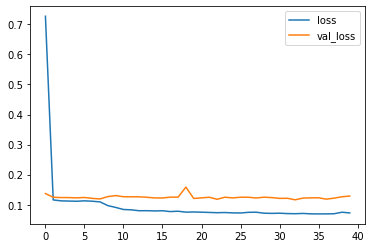

In [251]:
model_loss.plot()

In [252]:
predictions = model.predict_classes(X_test)

In [253]:
from sklearn.metrics import classification_report,confusion_matrix

In [254]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     89294
           1       0.78      0.04      0.07      2464

    accuracy                           0.97     91758
   macro avg       0.88      0.52      0.53     91758
weighted avg       0.97      0.97      0.96     91758



In [255]:
test= pd.read_csv('D:/test.csv/test.csv')

In [256]:
test=test[imp_col]
submission= pd.read_csv("D:/predict-potential-spammers-on-fiverr/sample_submission.csv")
predictions = model.predict(test)
submission.label = predictions
submission.columns = ['user_id', 'prediction']


In [257]:
submission

,user_id,prediction
0,57,0.00752
1,58,0.00752
2,59,0.00752
3,60,0.00752
4,61,0.00752
...,...,...
24143,482942,0.00752
24144,482943,0.00752
24145,482944,0.00752
24146,482945,0.00752


In [258]:
a=[]
for x in submission['prediction']:
    if x<0.5:
        a.append(0)
    else:
        a.append(1)

In [259]:
submission['prediction']=a

In [260]:
submission['prediction'].value_counts()

0    23634
1      514
Name: prediction, dtype: int64

In [261]:
submission.to_csv("D:/predict-potential-spammers-on-fiverr/sol5.csv", index=False)